# 모델 훈련과 세부튜닝

## 모델 훈련


> 최적의 머신러닝 모델은 1개가 아니라 여러 가지를 적용해보아야 함

- 분류 : KNN,SVM,Random Forest 등의 개별 알고리즘을 적용하거나, 이들의 결합인 앙상블기법 등을 적용하여 최상의 정확도와 일반화가 가능한 알고리즘을 선택

- 1개의 알고리즘 내에서 하이퍼 파라미터가 달라짐에 따라 주어진 과제에 가장 적합한 정확도와 일반화 모델이 존재하므로 Grid Search 및 Random Search 등 모델에 대한 세부 튜닝 과정을 거쳐야 함

## 모델의 탐색

### 그리드 탐색

- 기법 :  Grid Search는 사전에 탐색할 값들을 미리 지정해주고, 그 값들의 모든 조합을 바탕으로 성능의 최고점을 찾아냅니다.

- 장점 :  내가 원하는 범위를 정확하게 비교 분석이 가능하다.

- 단점 :  시간이 오래걸린다.

- knn 알고리즘에 많이 사용된다.

### 랜덤 탐색

- 기법 : 사전에 탐색할 값들의 범위를 지정해주고, 그 범위 속에서 가능한 조합을 바탕으로 최고점을 찾아냅니다.

- 장점 : Grid Search에 비해 시간이 짧게 걸린다.Grid Search보다, 랜덤하게 점들을 찍으니, 성능이 더 좋은 점으로 갈 가능성이 높다.

- 단점 : 반대로 성능이 Grid Search보다 낮을 수 있다. 하이퍼 파라미터의 범위가 너무 넓으면, 일반화된 결과가 나오지 않는다. (할 때 마다 달라진다) seed를 고정하지 않으면, 할 때 마다 결과가 달라진다. 마찬가지로, "최적값 검색"의 느낌이지, "최적화 탐색"의 개념이 아니다.

- 연구적으로 그리드 탐색보다 랜덤 탐색이 더 좋다는 연구결과가 있다.

# 실습

In [1]:
data<-read.csv("data/Fvote.csv", header=TRUE)
data<-data[ , 2:15]
data$vote<-factor(data$vote, labels=c("no", "yes"))
head(data)

gender.male,gender.female,region.Sudo,region.Chungcheung,region.Honam,region.Youngnam,region.Others,edu,income,age,score_gov,score_progress,score_intention,vote
1,0,0,0,0,1,0,1.0,0.6666667,0.6666667,0.25,0.25,0.75,yes
1,0,0,0,0,0,1,0.5,0.6666667,0.6666667,0.25,0.75,0.50,no
1,0,0,0,1,0,0,0.0,0.3333333,1.0000000,0.00,0.50,0.45,yes
0,1,1,0,0,0,0,0.5,0.0000000,0.6666667,1.00,0.75,0.40,yes
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.50,0.35,yes
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.00,0.75,0.70,yes


In [2]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2


In [3]:
set.seed(42)

In [4]:
training.samples <- createDataPartition(data$vote, p=0.7, list=F)

In [5]:
train <- data[training.samples,]

In [6]:
test <- data[-training.samples,]

- ROC 값 알려면 classProbs = TRUE, summaryFunction = twoClassSummary 설정해주기

In [7]:
train.control <- trainControl(method = "repeatedcv", number=5, repeats = 10,classProbs = TRUE, summaryFunction = twoClassSummary)

In [8]:
trainModel1<-train(vote~.,data=train, method = "knn", trControl = train.control)

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

In [9]:
trainModel1

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 118, 118, 119, 118, 119, 118, ... 
Resampling results across tuning parameters:

  k  ROC        Sens       Spec     
  5  0.5954696  0.3533333  0.7980952
  7  0.6090079  0.3247222  0.8380952
  9  0.6231746  0.2077778  0.8695238

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

- ROC는 (0,0) , (1,1) 둘다 잘 맞추는 비율을 말한다. 

## Grid Search

In [10]:
train.control2 <- trainControl(method = "repeatedcv", number=5, repeats = 10)

In [11]:
knnGrid=expand.grid(k=1:20)

In [12]:
trainModel2<-train(vote~.,data=train, method = "knn", trControl = train.control2, metric = "Accuracy", tuneGrid = knnGrid)

In [13]:
trainModel2

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 119, 118, 118, 118, 119, 119, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   1  0.5870115  0.07422350
   2  0.5853793  0.06873246
   3  0.5861839  0.03354572
   4  0.6093563  0.06300023
   5  0.6484138  0.11219012
   6  0.6586437  0.12998979
   7  0.6615172  0.10504443
   8  0.6622529  0.10006795
   9  0.6750115  0.08443963
  10  0.6737241  0.07297979
  11  0.6859080  0.08919602
  12  0.6892874  0.08162754
  13  0.7021379  0.10991195
  14  0.7061379  0.12221943
  15  0.7062069  0.10733119
  16  0.7122759  0.11688912
  17  0.7170115  0.12033344
  18  0.7122529  0.10793695
  19  0.7203448  0.12136003
  20  0.7171034  0.10804818

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 19.

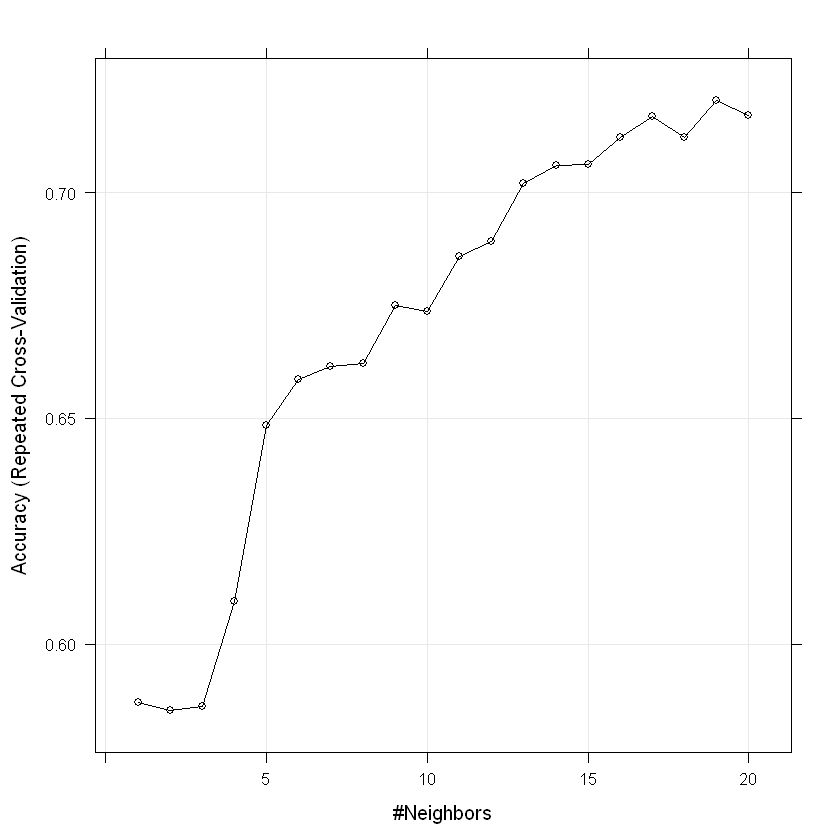

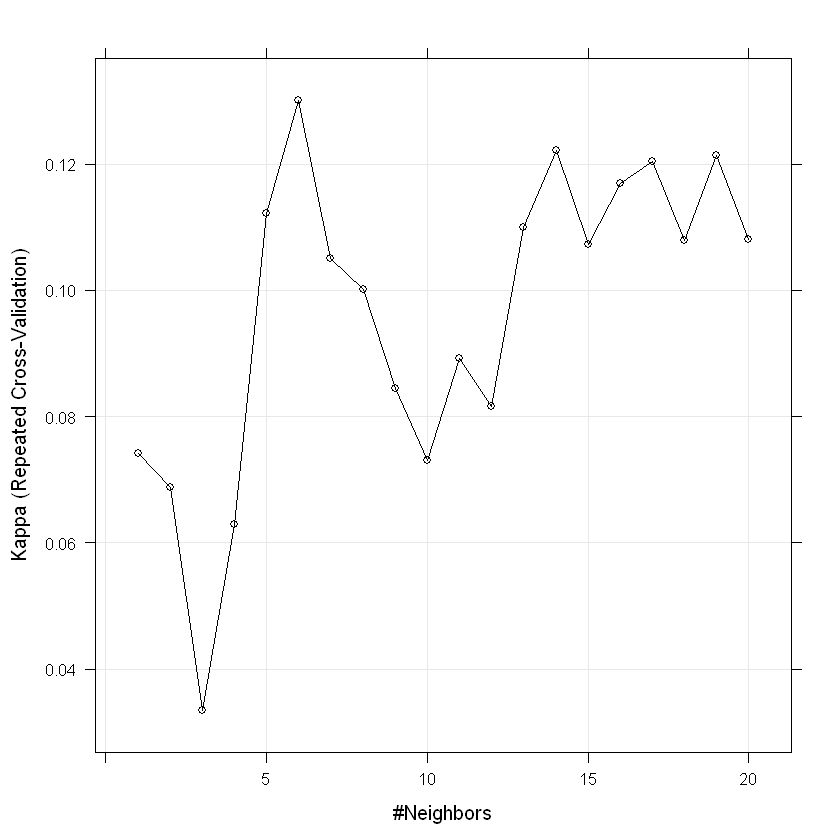

In [14]:
trellis.par.set(caretTheme())
plot(trainModel2) 
plot(trainModel2, metric = "Kappa")

- ROC 기준

In [15]:
train.control3 <- trainControl(method = "repeatedcv", number=5, repeats = 10,classProbs = TRUE, summaryFunction = twoClassSummary)

In [16]:
trainModel3<-train(vote~.,data=train, method = "knn", trControl = train.control3, metric = "ROC", tuneGrid = knnGrid)

In [17]:
trainModel3

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 119, 118, 119, 118, 118, 118, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   1  0.5470767  0.4222222  0.6714286
   2  0.5636640  0.4027778  0.6580952
   3  0.5575794  0.3277778  0.6933333
   4  0.5837500  0.3333333  0.7447619
   5  0.5991204  0.3247222  0.7952381
   6  0.5993519  0.3538889  0.7971429
   7  0.6106217  0.3063889  0.8209524
   8  0.6165146  0.2983333  0.8285714
   9  0.6252646  0.2641667  0.8552381
  10  0.6409921  0.2358333  0.8647619
  11  0.6440013  0.2169444  0.8923810
  12  0.6554960  0.2125000  0.8942857
  13  0.6622817  0.1866667  0.9133333
  14  0.6626786  0.2030556  0.9180952
  15  0.6658135  0.1772222  0.9295238
  16  0.6704828  0.1863889  0.9352381
  17  0.6684392  0.1616667  0.9457143
  18  0.6668783  0.1611111  0.9447619
  19  0.6687235  0.131

## 랜덤 서치 기반 모델 튜닝


In [18]:
train.control <- trainControl(method = "repeatedcv",
                           number = 5,
                           repeats = 10,
                           classProbs = TRUE,
                           search = "random")

In [19]:
TrainModel3 <- train(vote ~ ., data = train, 
                 method = "knn",
                 metric = "Accuracy",
                 tuneLength = 30,
                 trControl = train.control)
TrainModel3

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 118, 118, 119, 119, 118, 118, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa      
   1  0.6083218  0.102329780
   3  0.6021609  0.056188007
   5  0.6530575  0.127506114
   7  0.6666437  0.127326873
   9  0.6759770  0.099862741
  11  0.6874483  0.107093398
  13  0.7034713  0.120718932
  17  0.7190345  0.137517998
  21  0.7278621  0.145730444
  25  0.7204368  0.107666025
  29  0.7257931  0.109700143
  31  0.7299080  0.116217927
  35  0.7218161  0.067119894
  37  0.7151034  0.036919286
  45  0.7103448  0.003428571

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 31.

## 다소 심플한 모델의 탐색


In [22]:

whichTwoPct <- tolerance(trainModel2$results, metric = "Accuracy", tol = 2, maximize = TRUE)  
cat("best model within 2 pct of best:\n")
trainModel2$results[whichTwoPct,1:5]

best model within 2 pct of best:


,k,Accuracy,Kappa,AccuracySD,KappaSD
14,14,0.7061379,0.1222194,0.06536154,0.1827555


##  최종모델의 선택

In [23]:
# 7. 최종모델의 선택

finalControl <- trainControl(method = "none", classProbs = TRUE)

set.seed(42)
FinalModel <- train(vote ~ ., data = train, 
                 method = "knn", 
                 trControl = finalControl, 
                 tuneGrid = data.frame(k=8),
                 metric = "Accuracy")
FinalModel

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: None 

## 테스트데이터 및 신규데이터의 예측


In [25]:

predict(FinalModel, newdata = test)


[1] yes yes yes yes yes yes yes yes yes yes no  yes yes yes no  yes yes no  yes
[20] yes yes yes yes yes no  yes yes yes yes yes yes yes no  yes yes yes yes no 
[39] yes yes yes yes yes yes yes yes yes yes yes no  yes yes no  yes yes no  no 
[58] yes yes yes yes yes yes
Levels: no yes

In [26]:
predict(FinalModel, newdata = head(test))


[1] yes yes yes no  yes yes
Levels: no yes

In [27]:
predict(FinalModel, newdata =  head(test), type = "prob")


no,yes
0.375,0.625
0.125,0.875
0.250,0.750
0.500,0.500
0.125,0.875
0.500,0.500
